### Data import

In [1]:
# Load libraries
import pandas as pd
import time as time
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [78]:
# Set the display format for float variables to 7 decimal places
pd.options.display.float_format = '{:.7f}'.format

In [5]:
# Set the data path
path="C:/Users/pamka/OneDrive/Desktop/New folder/"

In [7]:
# Set the datasets to load

# file1 = "BEEBEERUN_0000100001.mat_data.csv"
file1 = "BEEBEERUN_0000100003.mat_data.csv"
# file1 = "BEEBEERUN_0000100005.mat_data.csv"
# file1 = "BEEBEERUN_0000100012.mat_data.csv"

# file2 = "INSPIRE_10M_FLYING_ABOVE00002.mat_data.csv"
# file2 = "INSPIRE_10M_FLYING_ABOVE00004.mat_data.csv"
# file2 = "INSPIRE_10M_FLYING_ABOVE00005.mat_data.csv"
file2 = "INSPIRE_10M_VIDEO_ABOVE00010.mat_data.csv"
# file2 = "INSPIRE_10M_VIDEO_ABOVE00014.mat_data.csv"

# file3 = "DJIM600_10M_FLYING_0000100001.mat_data.csv"
# file3 = "DJIM600_10M_FLYING_0000100003.mat_data.csv"
# file3 = "DJIM600_10M_FLYING_0000100005.mat_data.csv"
# file3 = "DJIM600_10M_FLYING_0000100008.mat_data.csv"
# file3 = "DJIM600_10M_FLYING_0000100013.mat_data.csv"
file3 = "DJIM600_10M_FLYING_0000100018.mat_data.csv"

file4 = "MAVICPRO_10M_HOVERING00001.mat_data.csv"
# file4 = "MAVICPRO_10M_FLYING00002.mat_data.csv"
# file4 = "MAVICPRO_10M_HOVERING00007.mat_data.csv"
# file4 = "MAVICPRO_10M_FLYING00009.mat_data.csv"
# file4 = "MAVICPRO_10M_HOVERING00010.mat_data.csv"
# file4 = "MAVICPRO_10M_HOVERING00012.mat_data.csv"

# file5 = "PHATHON_10M_HOVERING00004.mat_data.csv"
file5 = "PHATHON_10M_HOVERING00013.mat_data.csv"
# file5 = "PHATHON_10M_FLYING00025.mat_data.csv"

In [9]:
# Load the CSV files using numpy, only reading the "Data" column
data1 = np.genfromtxt(path+file1, delimiter=',', skip_header=1, usecols=[0], dtype=float)
data2 = np.genfromtxt(path+file2, delimiter=',', skip_header=1, usecols=[0], dtype=float)
data3 = np.genfromtxt(path+file3, delimiter=',', skip_header=1, usecols=[0], dtype=float)
data4 = np.genfromtxt(path+file4, delimiter=',', skip_header=1, usecols=[0], dtype=float)
data5 = np.genfromtxt(path+file5, delimiter=',', skip_header=1, usecols=[0], dtype=float)

print("Data 1: ", data1.shape)
print("Data 2: ", data2.shape)
print("Data 3: ", data3.shape)
print("Data 4: ", data4.shape)
print("Data 5: ", data5.shape)

Data1:  (5000000,)
Data2:  (5000000,)
Data3:  (5000000,)
Data4:  (5000000,)
Data5:  (5000000,)


In [11]:
# Remove missing values from the data
data1 = data1[~np.isnan(data1)]
data2 = data2[~np.isnan(data2)]
data3 = data3[~np.isnan(data3)]
data4 = data4[~np.isnan(data4)]
data5 = data5[~np.isnan(data5)]

print("Data 1: ", data1.shape)
print("Data 2: ", data2.shape)
print("Data 3: ", data3.shape)
print("Data 4: ", data4.shape)
print("Data 5: ", data5.shape)

Data1:  (5000000,)
Data2:  (5000000,)
Data3:  (5000000,)
Data4:  (5000000,)
Data5:  (5000000,)


In [13]:
# Scale the data
signal1 = data1 * 6.581e-06
signal2 = data2 * 6.581e-06
signal3 = data3 * 6.581e-06
signal4 = data4 * 6.581e-06
signal5 = data5 * 6.581e-06

### Fourier transform and Periodogram

In [16]:
# Compute the Fourier Transform - represents the signal as a sum of sinusoidal functions (sines and cosines) of different frequencies
fft1 = np.fft.fft(signal1)
fft2 = np.fft.fft(signal2)
fft3 = np.fft.fft(signal3)
fft4 = np.fft.fft(signal4)
fft5 = np.fft.fft(signal5)

In [22]:
# Compute the Power Spectral Density (PSD) - shows how much of the signal's power is contained in each frequency band
freqs1 = np.fft.fftfreq(len(signal1))
psd1 = np.abs(fft1)**2 / len(signal1)
freqs2 = np.fft.fftfreq(len(signal2))
psd2 = np.abs(fft2)**2 / len(signal2)
freqs3 = np.fft.fftfreq(len(signal3))
psd3 = np.abs(fft3)**2 / len(signal3)
freqs4 = np.fft.fftfreq(len(signal4))
psd4 = np.abs(fft4)**2 / len(signal4)
freqs5 = np.fft.fftfreq(len(signal5))
psd5 = np.abs(fft5)**2 / len(signal5)

In [34]:
# Filter out the negative frequencies as they mirror the positive frequency content
min_freq = 0

positive_freqs1 = freqs1[freqs1 >= min_freq]
positive_psd1 = psd1[freqs1 >= min_freq]
positive_freqs2 = freqs2[freqs2 >= min_freq]
positive_psd2 = psd2[freqs2 >= min_freq]
positive_freqs3 = freqs3[freqs3 >= min_freq]
positive_psd3 = psd3[freqs3 >= min_freq]
positive_freqs4 = freqs4[freqs4 >= min_freq]
positive_psd4 = psd4[freqs4 >= min_freq]
positive_freqs5 = freqs5[freqs5 >= min_freq]
positive_psd5 = psd5[freqs5 >= min_freq]

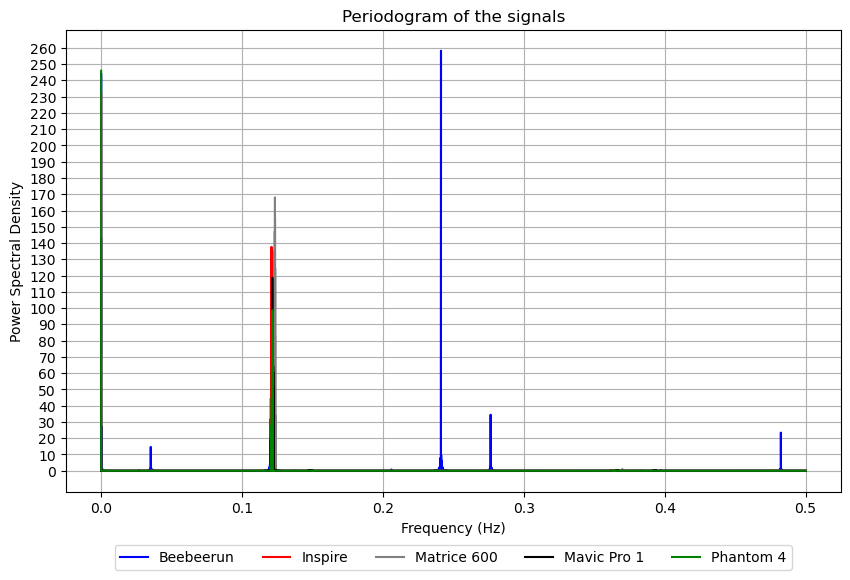

In [46]:
# Plot the periodogram of the signals
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs1, positive_psd1, label='Beebeerun', color='blue')
plt.plot(positive_freqs2, positive_psd2, label='Inspire', color='red')
plt.plot(positive_freqs3, positive_psd3, label='Matrice 600', color='grey')
plt.plot(positive_freqs4, positive_psd4, label='Mavic Pro 1', color='black')
plt.plot(positive_freqs5, positive_psd5, label='Phantom 4', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the signals')
plt.yticks(np.arange(0, max(positive_psd1) + 10, 10))
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()

### Identify the frequency ranges of the peaks

In [104]:
# Peak 1
min_freq = 0.000000
max_freq = 0.000007

# min_freq = 0.0000000
# max_freq = 0.0000009

# Final range for peak 1:
# min_freq = 0.0000000
# max_freq = 0.0000004

positive_freqs1 = freqs1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_psd1 = psd1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_freqs2 = freqs2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_psd2 = psd2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_freqs3 = freqs3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_psd3 = psd3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_freqs4 = freqs4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_psd4 = psd4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_freqs5 = freqs5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]
positive_psd5 = psd5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]

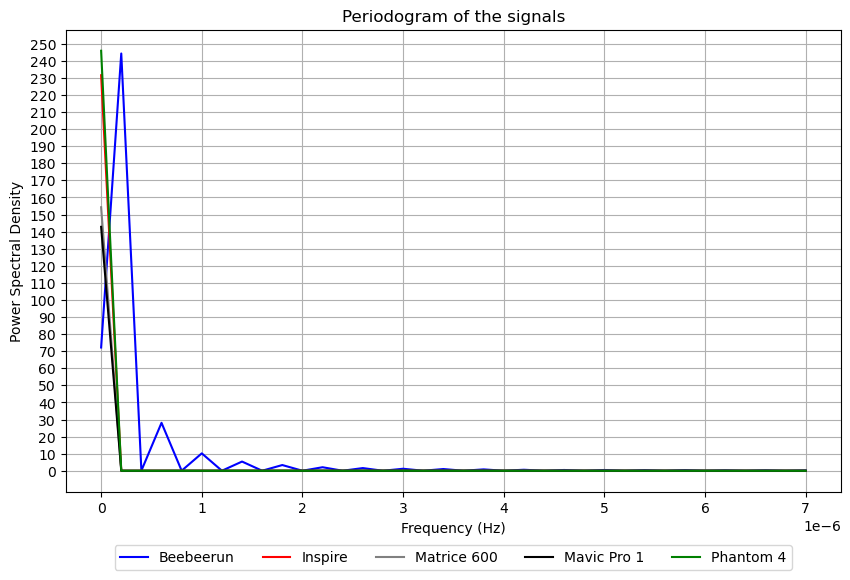

In [106]:
# Plot the periodogram of the signals
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs1, positive_psd1, label='Beebeerun', color='blue')
plt.plot(positive_freqs2, positive_psd2, label='Inspire', color='red')
plt.plot(positive_freqs3, positive_psd3, label='Matrice 600', color='grey')
plt.plot(positive_freqs4, positive_psd4, label='Mavic Pro 1', color='black')
plt.plot(positive_freqs5, positive_psd5, label='Phantom 4', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the signals')
plt.yticks(np.arange(0, max(positive_psd1) + 10, 10))
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()

In [144]:
# Peak 2
min_freq = 0.000000
max_freq = 0.020000

# min_freq = 0.0000004
# max_freq = 0.0090000

# Final range for peak 2:
# min_freq = 0.0000004
# max_freq = 0.0010000

positive_freqs1 = freqs1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_psd1 = psd1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_freqs2 = freqs2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_psd2 = psd2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_freqs3 = freqs3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_psd3 = psd3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_freqs4 = freqs4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_psd4 = psd4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_freqs5 = freqs5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]
positive_psd5 = psd5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]

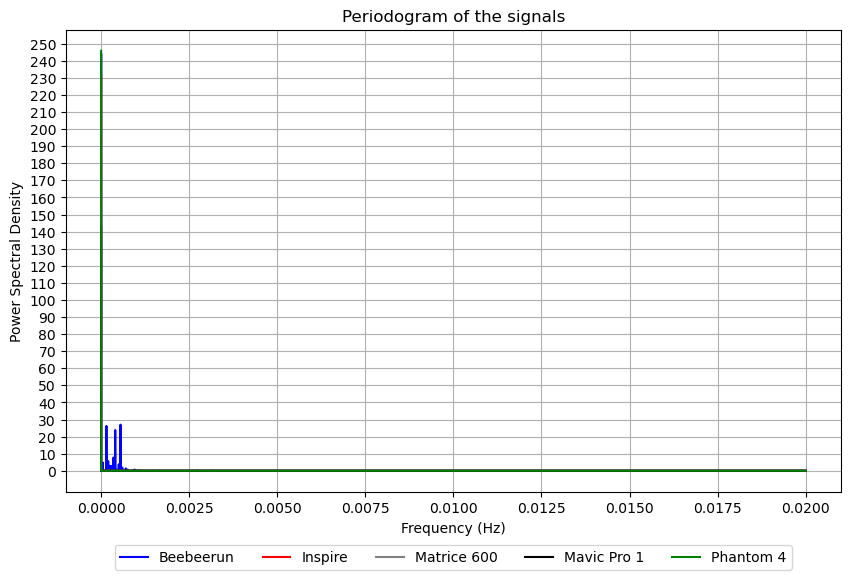

In [146]:
# Plot the periodogram of the signals
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs1, positive_psd1, label='Beebeerun', color='blue')
plt.plot(positive_freqs2, positive_psd2, label='Inspire', color='red')
plt.plot(positive_freqs3, positive_psd3, label='Matrice 600', color='grey')
plt.plot(positive_freqs4, positive_psd4, label='Mavic Pro 1', color='black')
plt.plot(positive_freqs5, positive_psd5, label='Phantom 4', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the signals')
plt.yticks(np.arange(0, max(positive_psd1) + 10, 10))
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()

In [176]:
# Peak 3
min_freq = 0.0010000
max_freq = 0.1300000

# min_freq = 0.030000
# max_freq = 0.040000

# Final range for peak 3:
# min_freq = 0.034000
# max_freq = 0.038000

positive_freqs1 = freqs1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_psd1 = psd1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_freqs2 = freqs2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_psd2 = psd2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_freqs3 = freqs3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_psd3 = psd3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_freqs4 = freqs4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_psd4 = psd4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_freqs5 = freqs5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]
positive_psd5 = psd5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]

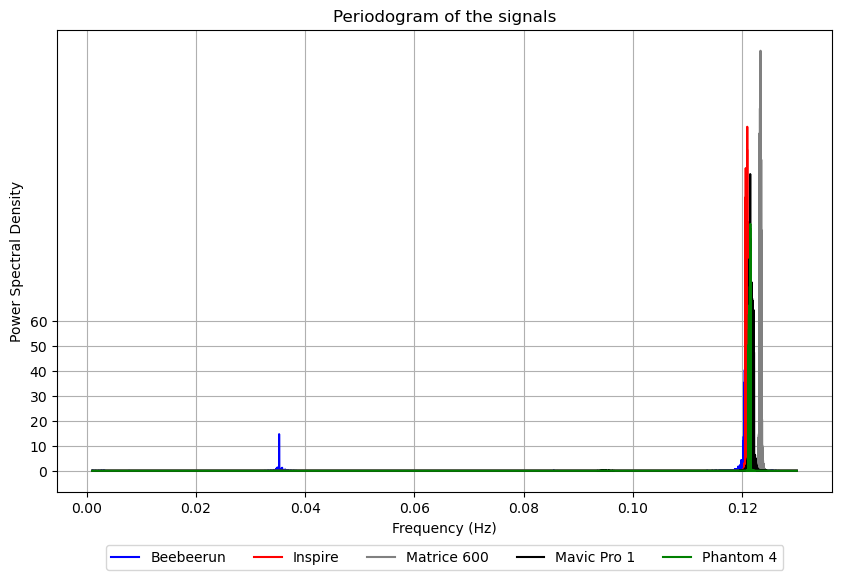

In [178]:
# Plot the periodogram of the signals
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs1, positive_psd1, label='Beebeerun', color='blue')
plt.plot(positive_freqs2, positive_psd2, label='Inspire', color='red')
plt.plot(positive_freqs3, positive_psd3, label='Matrice 600', color='grey')
plt.plot(positive_freqs4, positive_psd4, label='Mavic Pro 1', color='black')
plt.plot(positive_freqs5, positive_psd5, label='Phantom 4', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the signals')
plt.yticks(np.arange(0, max(positive_psd1) + 10, 10))
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()

In [204]:
# Peak 4
min_freq = 0.117
max_freq = 0.125

# Final range for peak 4:
# min_freq = 0.1205
# max_freq = 0.1211


positive_freqs1 = freqs1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_psd1 = psd1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_freqs2 = freqs2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_psd2 = psd2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_freqs3 = freqs3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_psd3 = psd3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_freqs4 = freqs4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_psd4 = psd4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_freqs5 = freqs5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]
positive_psd5 = psd5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]

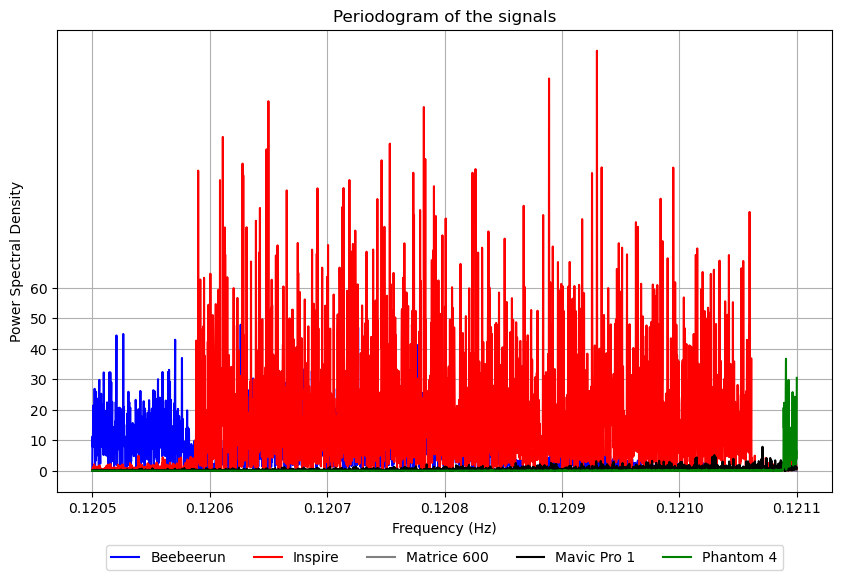

In [206]:
# Plot the periodogram of the signals
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs1, positive_psd1, label='Beebeerun', color='blue')
plt.plot(positive_freqs2, positive_psd2, label='Inspire', color='red')
plt.plot(positive_freqs3, positive_psd3, label='Matrice 600', color='grey')
plt.plot(positive_freqs4, positive_psd4, label='Mavic Pro 1', color='black')
plt.plot(positive_freqs5, positive_psd5, label='Phantom 4', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the signals')
plt.yticks(np.arange(0, max(positive_psd1) + 10, 10))
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()

In [220]:
# Peak 5
min_freq = 0.1211
max_freq = 0.1250

# Final range for peak 5:
# min_freq = 0.1211
# max_freq = 0.1215


positive_freqs1 = freqs1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_psd1 = psd1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_freqs2 = freqs2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_psd2 = psd2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_freqs3 = freqs3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_psd3 = psd3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_freqs4 = freqs4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_psd4 = psd4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_freqs5 = freqs5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]
positive_psd5 = psd5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]

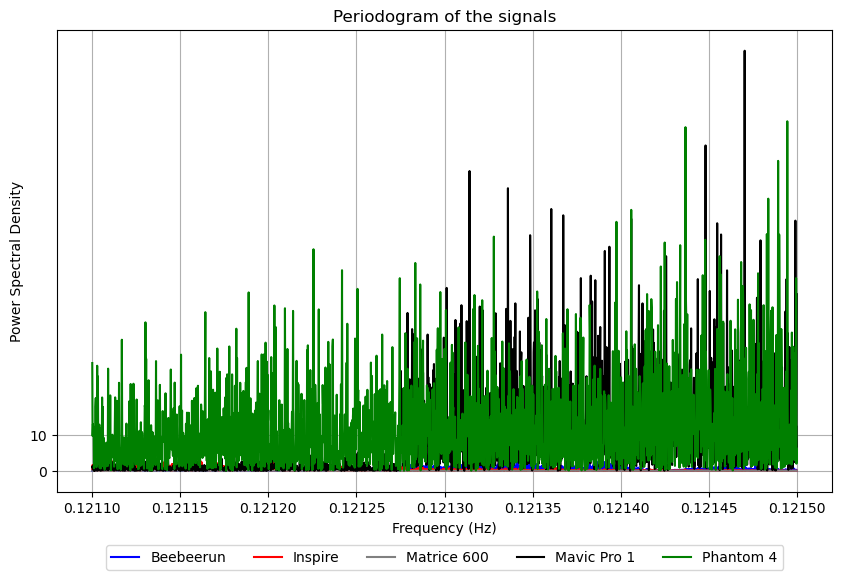

In [224]:
# Plot the periodogram of the signals
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs1, positive_psd1, label='Beebeerun', color='blue')
plt.plot(positive_freqs2, positive_psd2, label='Inspire', color='red')
plt.plot(positive_freqs3, positive_psd3, label='Matrice 600', color='grey')
plt.plot(positive_freqs4, positive_psd4, label='Mavic Pro 1', color='black')
plt.plot(positive_freqs5, positive_psd5, label='Phantom 4', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the signals')
plt.yticks(np.arange(0, max(positive_psd1) + 10, 10))
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()

In [234]:
# Peak 6
min_freq = 0.1215
max_freq = 0.1230

# Final range for peak 6:
# min_freq = 0.1215
# max_freq = 0.1225


positive_freqs1 = freqs1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_psd1 = psd1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_freqs2 = freqs2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_psd2 = psd2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_freqs3 = freqs3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_psd3 = psd3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_freqs4 = freqs4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_psd4 = psd4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_freqs5 = freqs5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]
positive_psd5 = psd5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]

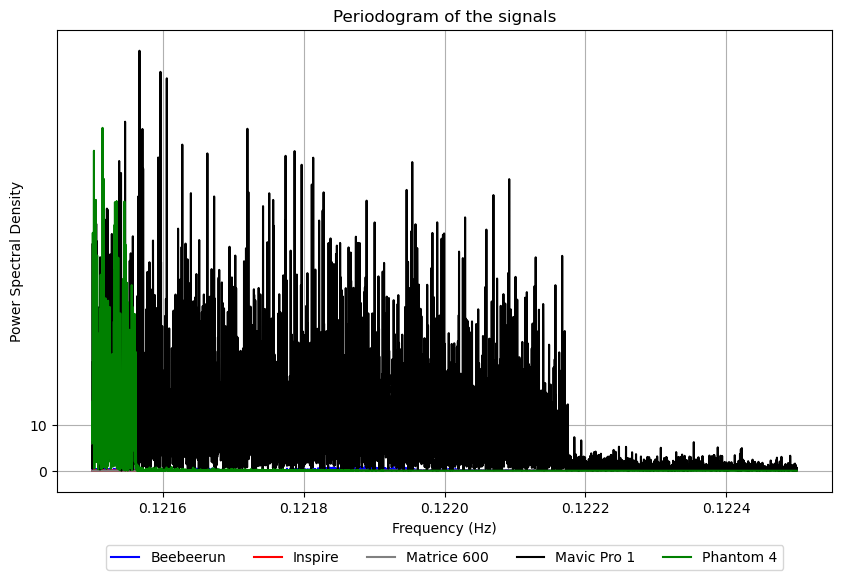

In [236]:
# Plot the periodogram of the signals
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs1, positive_psd1, label='Beebeerun', color='blue')
plt.plot(positive_freqs2, positive_psd2, label='Inspire', color='red')
plt.plot(positive_freqs3, positive_psd3, label='Matrice 600', color='grey')
plt.plot(positive_freqs4, positive_psd4, label='Mavic Pro 1', color='black')
plt.plot(positive_freqs5, positive_psd5, label='Phantom 4', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the signals')
plt.yticks(np.arange(0, max(positive_psd1) + 10, 10))
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()

In [242]:
# Peak 7
min_freq = 0.1225
max_freq = 0.1250

# Final range for peak 7:
# min_freq = 0.1230
# max_freq = 0.1236


positive_freqs1 = freqs1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_psd1 = psd1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_freqs2 = freqs2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_psd2 = psd2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_freqs3 = freqs3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_psd3 = psd3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_freqs4 = freqs4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_psd4 = psd4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_freqs5 = freqs5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]
positive_psd5 = psd5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]

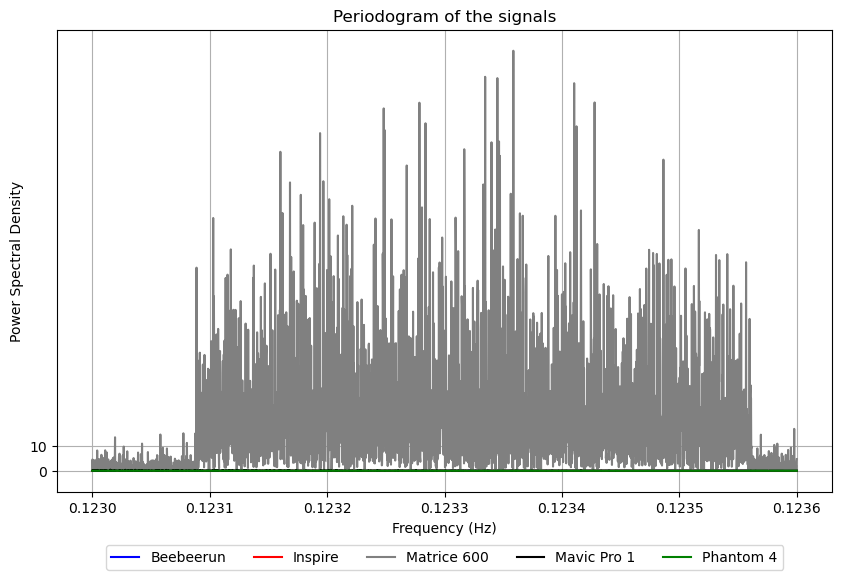

In [244]:
# Plot the periodogram of the signals
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs1, positive_psd1, label='Beebeerun', color='blue')
plt.plot(positive_freqs2, positive_psd2, label='Inspire', color='red')
plt.plot(positive_freqs3, positive_psd3, label='Matrice 600', color='grey')
plt.plot(positive_freqs4, positive_psd4, label='Mavic Pro 1', color='black')
plt.plot(positive_freqs5, positive_psd5, label='Phantom 4', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the signals')
plt.yticks(np.arange(0, max(positive_psd1) + 10, 10))
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()

In [266]:
# Peak 8
min_freq = 0.225
max_freq = 0.500

# Final range for peak 8:
# min_freq = 0.240
# max_freq = 0.245


positive_freqs1 = freqs1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_psd1 = psd1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_freqs2 = freqs2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_psd2 = psd2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_freqs3 = freqs3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_psd3 = psd3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_freqs4 = freqs4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_psd4 = psd4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_freqs5 = freqs5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]
positive_psd5 = psd5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]

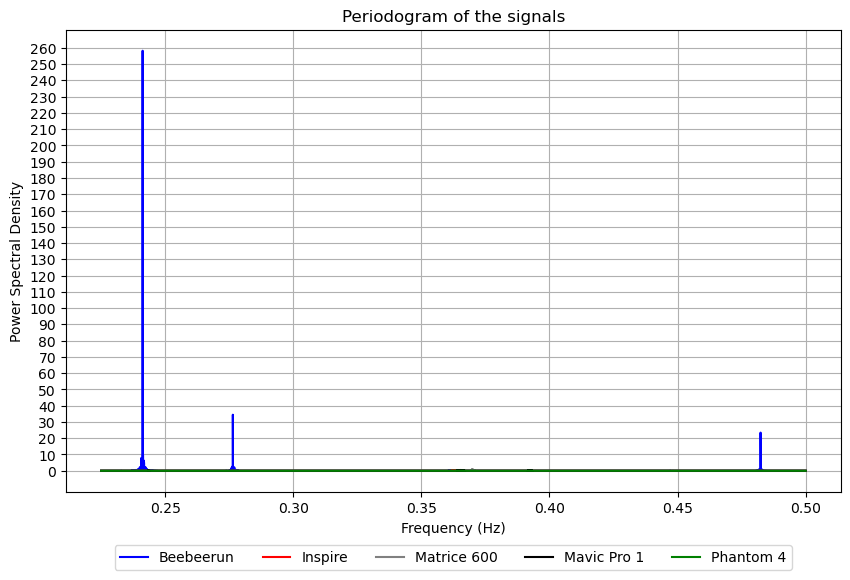

In [268]:
# Plot the periodogram of the signals
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs1, positive_psd1, label='Beebeerun', color='blue')
plt.plot(positive_freqs2, positive_psd2, label='Inspire', color='red')
plt.plot(positive_freqs3, positive_psd3, label='Matrice 600', color='grey')
plt.plot(positive_freqs4, positive_psd4, label='Mavic Pro 1', color='black')
plt.plot(positive_freqs5, positive_psd5, label='Phantom 4', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the signals')
plt.yticks(np.arange(0, max(positive_psd1) + 10, 10))
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()

In [274]:
# Peak 9
min_freq = 0.240
max_freq = 0.300

# Final range for peak 9:
# min_freq = 0.275
# max_freq = 0.280


positive_freqs1 = freqs1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_psd1 = psd1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_freqs2 = freqs2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_psd2 = psd2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_freqs3 = freqs3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_psd3 = psd3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_freqs4 = freqs4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_psd4 = psd4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_freqs5 = freqs5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]
positive_psd5 = psd5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]

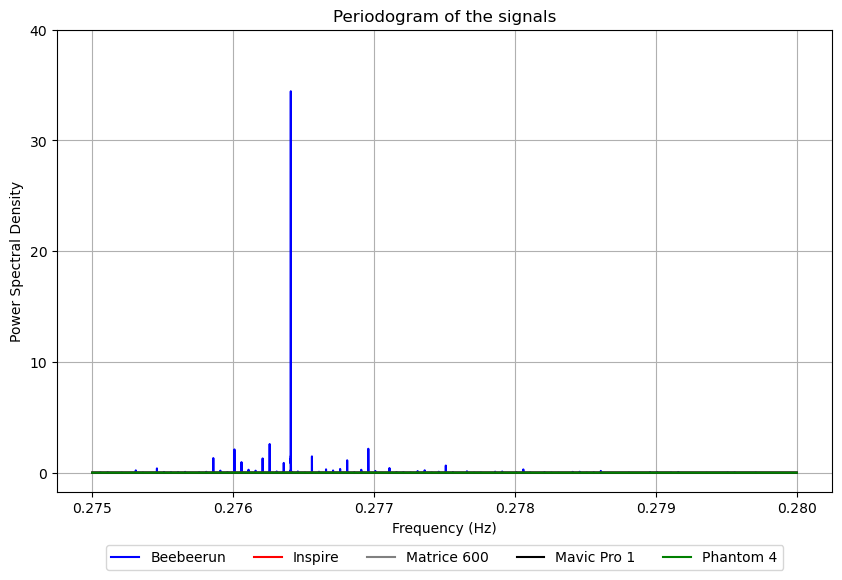

In [276]:
# Plot the periodogram of the signals
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs1, positive_psd1, label='Beebeerun', color='blue')
plt.plot(positive_freqs2, positive_psd2, label='Inspire', color='red')
plt.plot(positive_freqs3, positive_psd3, label='Matrice 600', color='grey')
plt.plot(positive_freqs4, positive_psd4, label='Mavic Pro 1', color='black')
plt.plot(positive_freqs5, positive_psd5, label='Phantom 4', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the signals')
plt.yticks(np.arange(0, max(positive_psd1) + 10, 10))
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()

In [291]:
# Peak 10
min_freq = 0.280
max_freq = 0.5

# Final range for peak 10:
# min_freq = 0.475
# max_freq = 0.490

positive_freqs1 = freqs1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_psd1 = psd1[(freqs1 >= min_freq) & (freqs1 <= max_freq)]
positive_freqs2 = freqs2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_psd2 = psd2[(freqs2 >= min_freq) & (freqs2 <= max_freq)]
positive_freqs3 = freqs3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_psd3 = psd3[(freqs3 >= min_freq) & (freqs3 <= max_freq)]
positive_freqs4 = freqs4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_psd4 = psd4[(freqs4 >= min_freq) & (freqs4 <= max_freq)]
positive_freqs5 = freqs5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]
positive_psd5 = psd5[(freqs5 >= min_freq) & (freqs5 <= max_freq)]

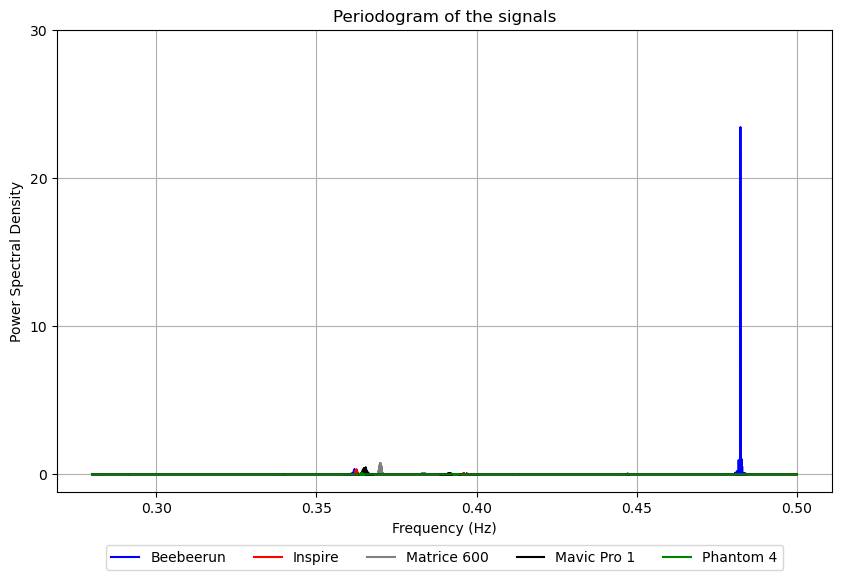

In [293]:
# Plot the periodogram of the signals
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs1, positive_psd1, label='Beebeerun', color='blue')
plt.plot(positive_freqs2, positive_psd2, label='Inspire', color='red')
plt.plot(positive_freqs3, positive_psd3, label='Matrice 600', color='grey')
plt.plot(positive_freqs4, positive_psd4, label='Mavic Pro 1', color='black')
plt.plot(positive_freqs5, positive_psd5, label='Phantom 4', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of the signals')
plt.yticks(np.arange(0, max(positive_psd1) + 10, 10))
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.show()